<a href="https://colab.research.google.com/github/chain-veerender/datascience/blob/master/Visualize_matplotlib_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matplotlib**

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes:

1. Allow for interactive, cross-platform control of figures and plots

2. Make it easy to produce static raster or vector graphics files without the need for any GUIs.

![An image](https://github.com/matplotlib/AnatomyOfMatplotlib/raw/e51eb6363371f1b271b235a63f859dbd984ff756//images/figure_axes_axis_labeled.png)

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis

Axes

All plotting is done with respect to an Axes. An Axes is made up of Axis objects and many other things. An Axes object must belong to a Figure (and only one Figure). Most commands you will ever issue will be with respect to this Axes object.

Typically, you'll set up a Figure, and then add an Axes to it.

You can use fig.add_axes, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Plot - 1 subplot

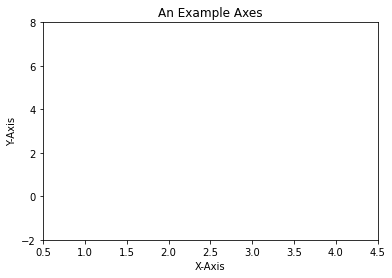

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel= 'X-Axis')
plt.show()

Notice the call to set. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with set_<something> and control a particular option.

set_ method calling

there are cases where you'll want to use things like ax.set_xlabel('Some Label', size=25)

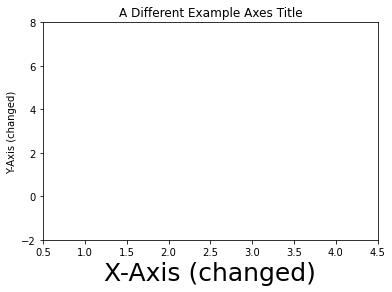

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)',size = 25)   
plt.show()

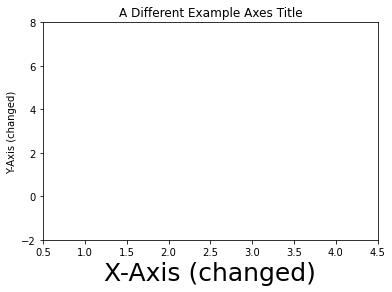

In [9]:
#fig, ax = plt.subplots(nrows=1, ncols=1)
plt.xlim([0.5, 4.5])
plt.ylim([-2, 8])
plt.title('A Different Example Axes Title')
plt.ylabel('Y-Axis (changed)')
plt.xlabel('X-Axis (changed)',size = 25)   
plt.show()

Basic Plotting

Most plotting happens on an Axes. Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section. For now, let's focus on two methods: **plot and scatter**.

plot draws points with lines connecting them. 

scatter draws unconnected points, optionally scaled or colored by additional variables.



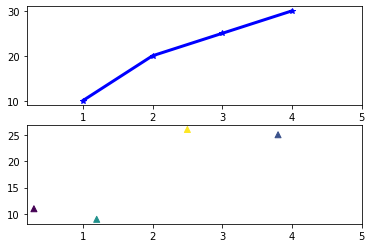

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot([1, 2, 3, 4], [10, 20, 25, 30], color='blue', linewidth=3, marker = '*')
ax[1].scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax[0].set_xlim(0.2, 5)
ax[1].set_xlim(0.2,5)
plt.show()

Axes methods vs. pyplot

Interestingly, just about all methods of an Axes object exist as a function in the pyplot module (and vice-versa). For example, when calling plt.xlim(1, 10), pyplot calls ax.set_xlim(1, 10) on whichever Axes is "current". Here is an equivalent version of the above example using just pyplot.

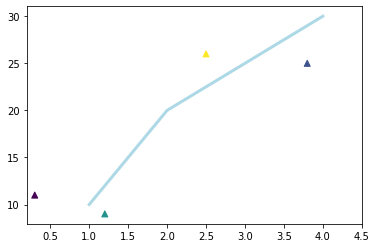

In [ ]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.2, 4.5)
plt.show()

**when there is ax.set_lim then why plt.xlim ?**

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the Axes and/or Figure object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

Plot - 4 subplots - 2x2

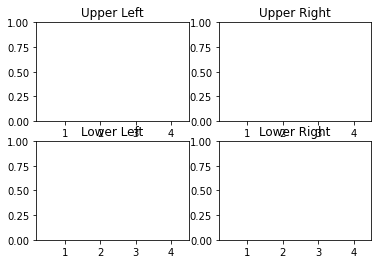

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

#plt.xlim(0.2,4.5)   # uncomment this for misinterpretation of multipleplots
# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    
    ax.set_xlim(0.2, 4.5)
    # Remove all xticks and yticks...
    #ax.set(xticks=[], yticks=[])
    
plt.show()

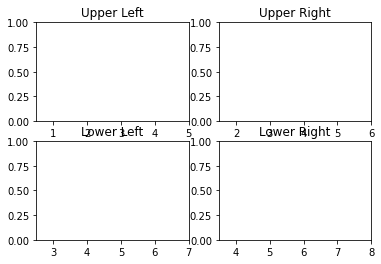

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')
axes[0,0].set_xlim([0.5,5])
axes[0,1].set_xlim([1.5,6])
axes[1,0].set_xlim([2.5,7])
axes[1,1].set_xlim([3.5,8])


#plt.xlim(0.2,4.5)   # uncomment this for misinterpretation of multipleplots
# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
#for ax in axes.flat:
    
    #ax.set_xlim(0.2, 4.5)
    # Remove all xticks and yticks...
    #ax.set(xticks=[], yticks=[])
    
plt.show()

**Plot the data**

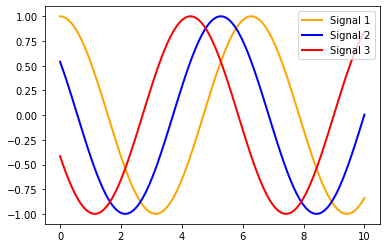

In [24]:
x = np.linspace(0, 10, 100)  # [lower,upper,number of values]
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
#y1 = np.linspace(2,50,100)
#y2 = np.linspace(3,100,100)
#y3 = np.linspace(4,80,100)
names = ['Signal 1', 'Signal 2', 'Signal 3']
plt.plot(x,y1,color='orange',linewidth=2,label=names[0])
plt.plot(x,y2,color='blue',linewidth=2,label=names[1])
plt.plot(x,y3,color='red',linewidth=2,label=names[2])
plt.legend(loc='upper right')
#plt.xlim(2,5)
plt.show()

Lets visualize different plots and interpretation on company sales dataset

 you can download data from [here](https://raw.githubusercontent.com/chain-veerender/datascience/master/company_sales_data.csv)

In [25]:
from google.colab import files
 
 
upload_file = files.upload()

Saving company_sales_data.csv to company_sales_data.csv


In [26]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(upload_file['company_sales_data.csv']))
print(df)

    month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0              1       2500      1500        5200         9200     1200   
1              2       2630      1200        5100         6100     2100   
2              3       2140      1340        4550         9550     3550   
3              4       3400      1130        5870         8870     1870   
4              5       3600      1740        4560         7760     1560   
5              6       2760      1555        4890         7490     1890   
6              7       2980      1120        4780         8980     1780   
7              8       3700      1400        5860         9960     2860   
8              9       3540      1780        6100         8100     2100   
9             10       1990      1890        8300        10300     2300   
10            11       2340      2100        7300        13300     2400   
11            12       2900      1760        7400        14400     1800   

    moisturizer  total_u

**Line Plot**

Read Total profit of all months and show it using a line plot

Total profit data provided for each month. Generated line plot must include the following properties:

X label name = Month Number

Y label name = Total profit


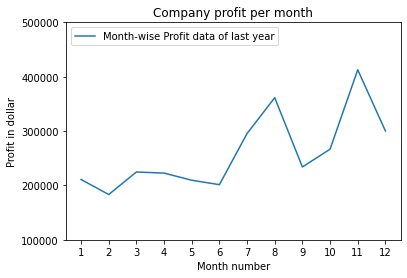

In [28]:
profitList = df ['total_profit'].tolist()
monthList  = df ['month_number'].tolist()
plt.plot(monthList, profitList, label = 'Month-wise Profit data of last year')
plt.xlabel('Month number')
plt.ylabel('Profit in dollar')
plt.xticks(monthList)
plt.title('Company profit per month')
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.legend(loc = 'upper left')
plt.show()

**Dotted Line**

Generated dotted plot must include following Style properties:

Line Style dotted and Line-color should be red

Show legend at the lower right location.

X label name = Month Number

Y label name = Sold units number

Add a circle marker.

Line marker color as read

Line width should be 3

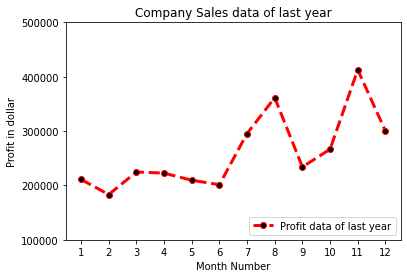

In [ ]:
plt.plot(monthList, profitList, label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=3)
      
plt.xlabel('Month Number')
plt.ylabel('Profit in dollar')
plt.legend(loc='lower right')
plt.title('Company Sales data of last year')
plt.xticks(monthList)
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()

**Multi line plot**

Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

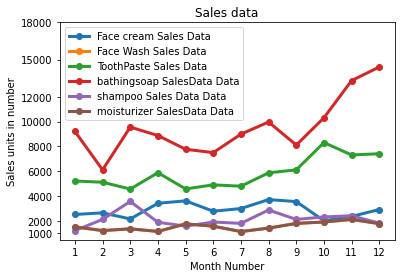

In [29]:
faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()
toothPasteSalesData = df ['toothpaste'].tolist()
bathingsoapSalesData   = df ['bathingsoap'].tolist()
shampooSalesData   = df ['shampoo'].tolist()
moisturizerSalesData = df ['moisturizer'].tolist()

plt.plot(monthList, faceCremSalesData,   label = 'Face cream Sales Data', marker='o', linewidth=3)
plt.plot(monthList, faceWashSalesData,   label = 'Face Wash Sales Data',  marker='o', linewidth=3)
plt.plot(monthList, toothPasteSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
plt.plot(monthList, bathingsoapSalesData, label = 'bathingsoap SalesData Data', marker='o', linewidth=3)
plt.plot(monthList, shampooSalesData, label = 'shampoo Sales Data Data', marker='o', linewidth=3)
plt.plot(monthList, moisturizerSalesData, label = 'moisturizer SalesData Data', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.title('Sales data')
plt.show()

**Scatter plot**

Read toothpaste sales data of each month and show it using a scatter plot

Also, add a grid in the plot. gridline style should '--'

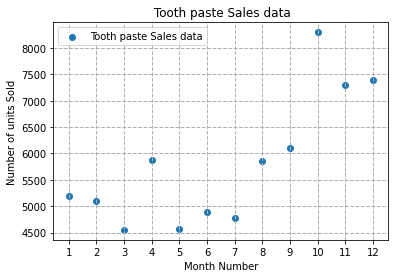

In [ ]:
toothPasteSalesData = df ['toothpaste'].tolist()
plt.scatter(monthList, toothPasteSalesData, label = 'Tooth paste Sales data')
plt.xlabel('Month Number')
plt.ylabel('Number of units Sold')
plt.legend(loc='upper left')
plt.title(' Tooth paste Sales data')
plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

**Bar chart**

Read face cream and facewash product sales data and show it using the bar chart

The bar chart should display the number of units sold per month for each product. 

Add a separate bar for each product in the same chart.

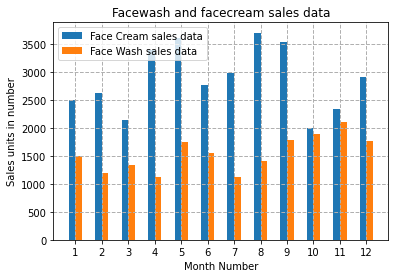

In [ ]:
faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()

plt.bar([a-0.25 for a in monthList], faceCremSalesData, width= 0.25, label = 'Face Cream sales data', align='edge')
plt.bar([a+0.25 for a in monthList], faceWashSalesData, width= -0.25, label = 'Face Wash sales data', align='edge')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.title(' Sales data')

plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Facewash and facecream sales data')
plt.show()

Read sales data of bathing soap of all months and show it using a bar chart

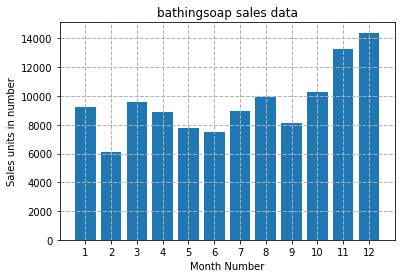

In [ ]:
bathingsoapSalesData   = df ['bathingsoap'].tolist()
plt.bar(monthList, bathingsoapSalesData)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.title(' Sales data')
plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('bathingsoap sales data')
plt.show()

**Histogram**

Read the total profit of each month and show it using the histogram to see the most common profit ranges

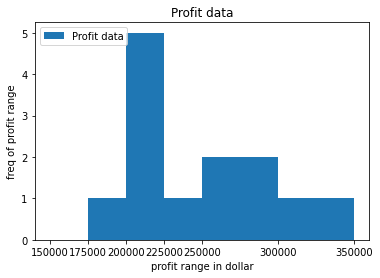

In [ ]:
profitList = df ['total_profit'].tolist()
labels = ['low', 'average', 'Good', 'Best']
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
plt.hist(profitList, profit_range, label = 'Profit data')
plt.xlabel('profit range in dollar')
plt.ylabel('freq of profit range')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')
plt.show()

**Pie chart**

Calculate total sale data for last year for each product and show it using a Pie chart

Note: In Pie chart display Number of units sold per year for each product in percentage.


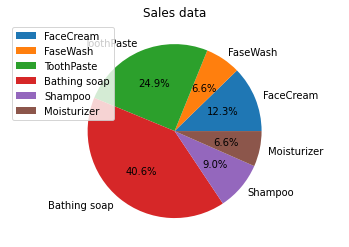

In [ ]:
labels = ['FaceCream', 'FaseWash', 'ToothPaste', 'Bathing soap', 'Shampoo', 'Moisturizer']
salesData   = [df ['facecream'].sum(), df ['facewash'].sum(), df ['toothpaste'].sum(), 
         df ['bathingsoap'].sum(), df ['shampoo'].sum(), df ['moisturizer'].sum()]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Sales data')
plt.show()

**Subplots**

Make 2 subplots for 

1. Bathing soap

2. facewash

sharing same range of values for x-axis

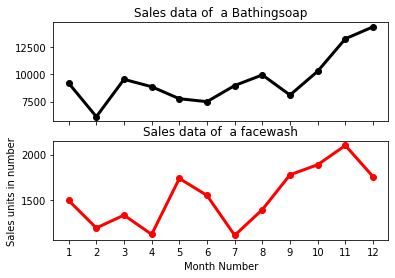

In [ ]:
bathingsoap   = df ['bathingsoap'].tolist()
faceWashSalesData   = df ['facewash'].tolist()

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(monthList, bathingsoap, label = 'Bathingsoap Sales Data', color='k', marker='o', linewidth=3)
axarr[0].set_title('Sales data of  a Bathingsoap')
axarr[1].plot(monthList, faceWashSalesData, label = 'Face Wash Sales Data', color='r', marker='o', linewidth=3)
axarr[1].set_title('Sales data of  a facewash')

plt.xticks(monthList)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.show()

**Stack plot**

Read all product sales data and show it using the stack plot

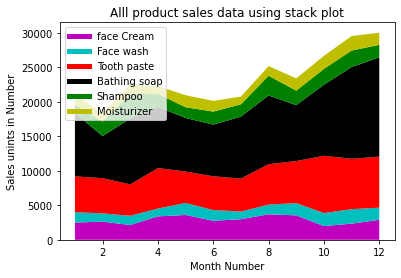

In [ ]:
faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()
toothPasteSalesData = df ['toothpaste'].tolist()
bathingsoapSalesData   = df ['bathingsoap'].tolist()
shampooSalesData   = df ['shampoo'].tolist()
moisturizerSalesData = df ['moisturizer'].tolist()

plt.plot([],[],color='m', label='face Cream', linewidth=5)
plt.plot([],[],color='c', label='Face wash', linewidth=5)
plt.plot([],[],color='r', label='Tooth paste', linewidth=5)
plt.plot([],[],color='k', label='Bathing soap', linewidth=5)
plt.plot([],[],color='g', label='Shampoo', linewidth=5)
plt.plot([],[],color='y', label='Moisturizer', linewidth=5)

plt.stackplot(monthList, faceCremSalesData, faceWashSalesData, toothPasteSalesData, 
              bathingsoapSalesData, shampooSalesData, moisturizerSalesData, 
              colors=['m','c','r','k','g','y'])

plt.xlabel('Month Number')
plt.ylabel('Sales unints in Number')
plt.title('Alll product sales data using stack plot')
plt.legend(loc='upper left')
plt.show()

**Seaborn Plots**

why seaborn when job is done with matplotlib ?

Visualizing relation of variables using seaborn pair plots

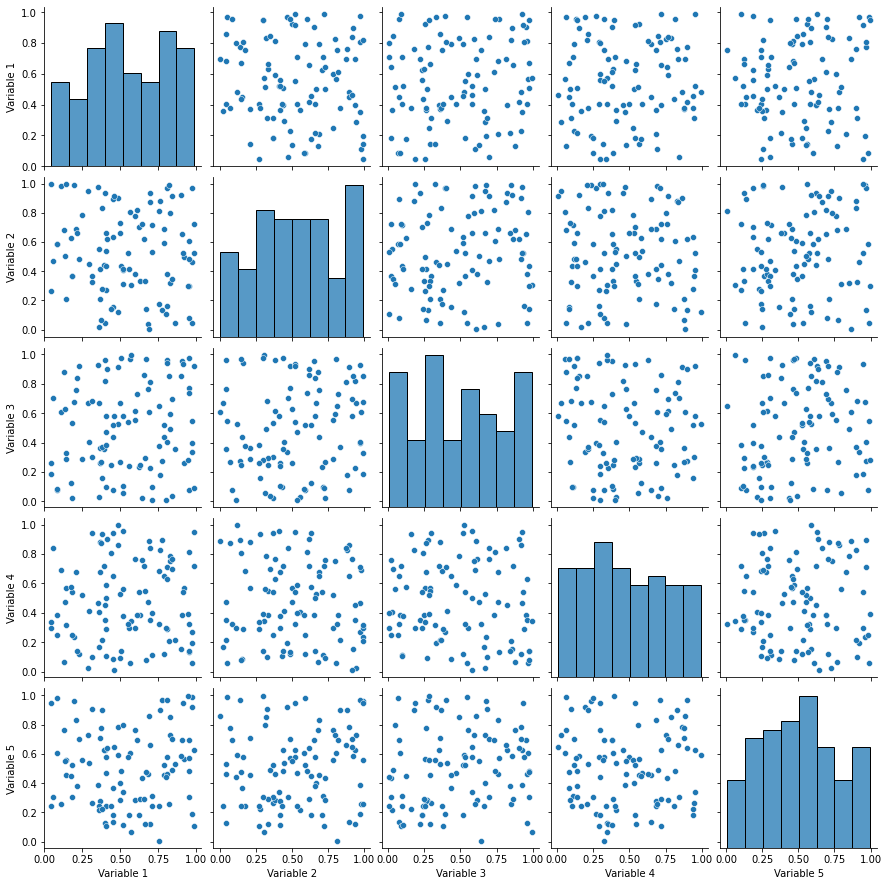

In [ ]:
# Generate Data:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]
df = pd.DataFrame(data, columns=columns)

# Making a simple pairplot using Seaborn:
sns.pairplot(df)

Same visualization using matplotlib

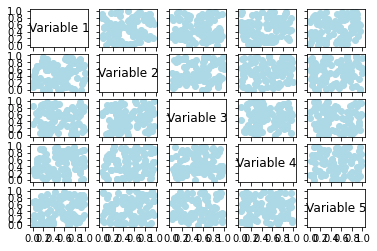

In [ ]:
# Generatig Data:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]

# Making a pairplot:
fig, axes = plt.subplots(ncols=nvars, nrows=nvars, sharex='col', sharey='row')
for (i, j), ax in np.ndenumerate(axes):
    if i == j:
        ax.annotate(columns[i], (0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center', size='large')
    else:
        ax.scatter(data[:,i], data[:,j], color='lightblue')
    ax.locator_params(nbins=6, prune='both')

plt.show()

One of the biggest advantages of Seaborn over Matplotlib is that its default aesthetics are visually far more appealing. Undoubtedly Matplotlib is highly customizable, but sometimes it may get difficult to know exact settings to tweak in order to achieve an attractive plot. Whereas, Seaborn comes with a number of customized themes and a high-level interface for controlling the look of same matplotlib figures.



**Seaborn Color Palettes**

Color is an utmost important aspect of figure styling because it reveals pattern in the data if used effectively; or hide those patterns if used poorly. Even professionals often assume usage of color to portray data as a solved problem. They just pick a palette from a drop-down menu (probably either a grayscale ramp or a rainbow), set start and end points & finally press apply. But it isn't that simple and thus many visualizations fail to represent the underlying data as appropriately as they could.

Primary objective with choice of color is to illuminate datapoints that are concealed in huge datasets. Quoting Robert Simmon:

Although the basics are straightforward, a number of issue complicate color choices in visualization. Among them: The relationship between the light we see and the colors we perceive is extremely complicated. There are multiple types of data, each suited to a different color scheme. A significant number of people (mostly men), are color blind. Arbitrary color choices can be confusing for viewers unfamiliar with a data set. Light colors on a dark field are perceived differently than dark colors on a bright field, which can complicate some visualization tasks, such as target detection.

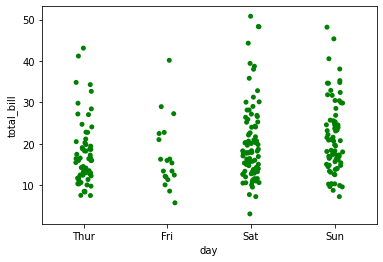

In [ ]:
# Loading up built-in dataset:
tips = sns.load_dataset("tips")

# Creating Strip plot for day-wise revenue:
sns.stripplot(x="day", y="total_bill", data=tips, color="g")

replace color parameter with palette parameter

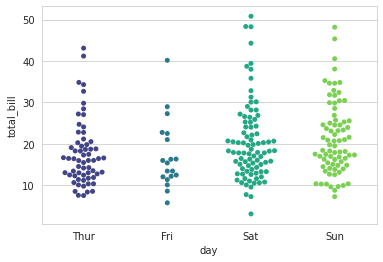

In [ ]:
# Set Theme:
sns.set_style('whitegrid')

# Creating Strip plot for day-wise revenue:
sns.swarmplot(x="day", y="total_bill", data=tips, palette="viridis")

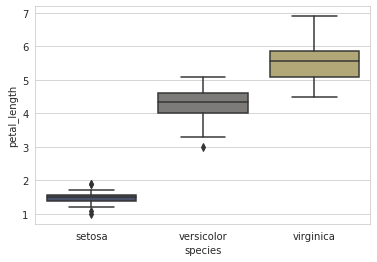

In [ ]:
iris = sns.load_dataset("iris")

sns.boxplot(x="species", y="petal_length", data=iris, palette="cividis")

There are multiple such palette available for us to play around with like magma, warm grey, gunmetal, dusky blue, cool blue, deep teal, viridian, twilight blue and many more. For customized color brewing, we may also use color brewer that also offers interesting color palettes for working with Qualitative data. The cool thing about it is that you can use the an interactive Ipython widget function to make the selection of the palette. For this, you only need to use choose_colorbrewer_palette()

This is a list of Tableau colors that is available in Matplotlib and can be used in Seaborn as well

In [ ]:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling avove RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

In [ ]:
tableau_20[4]

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

**Joint plot**

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:

scatter

reg

resid

kde

hex

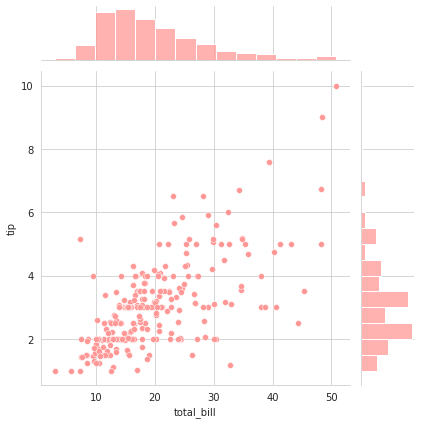

In [ ]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")

# Plotting a simple Jointplot:
sns.jointplot(x="total_bill", y="tip", data=tips, color=tableau_20[7])

if we wish to reduce the size of scattered dots in our plot, we may chose to add sizes parameter as a Tuple like sns.jointplot(x="total_bill", y="tip", data=tips, color=tableau_20[7], kind="scatter", sizes=(20,0)). These spines represent Gaussian distribution of a sample space, which in our case comprises of Total bill and associated tips from our dataset. Let us fit the Density curve on top of it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


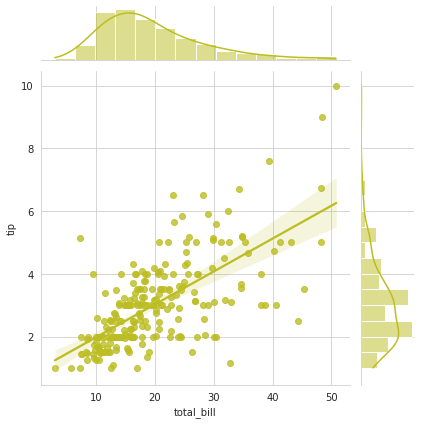

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg", color=tableau_20[16])

**hexagonal bins** 

replaces scatter dots to fill in for our data points

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


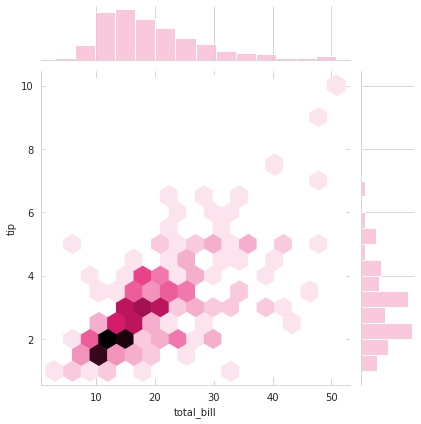

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex", color=tableau_20[13])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


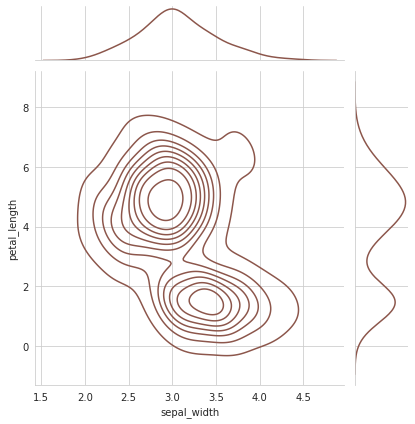

In [ ]:
# Loading Iris dataset:
iris = sns.load_dataset("iris")

# Replace the scatterplots and histograms with density estimates and align the marginal Axes tightly with joint Axes:
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0.2, color=tableau_20[10])

**Distribution plots**

What is Distribution Plots?

Flexibly plot a univariate distribution of observations.
This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. 

It can also fit scipy.stats distributions and plot the estimated PDF over the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


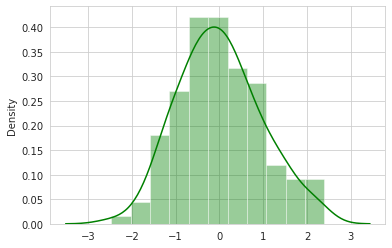

In [ ]:
num = np.random.randn(150)
sns.distplot(num,color ='green')

with out histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


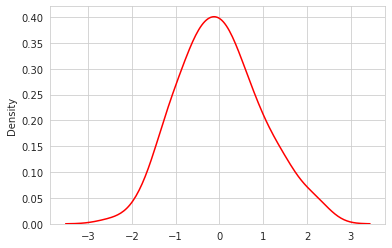

In [ ]:
sns.distplot(num,hist = False,color = "red")

**pair plot**

pairplot() will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

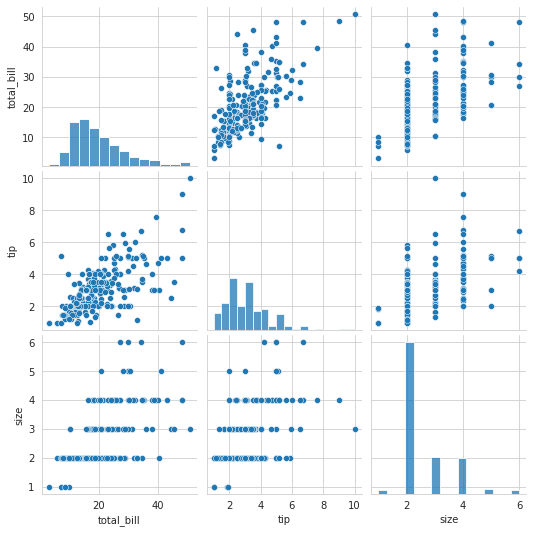

In [ ]:
sns.pairplot(tips)

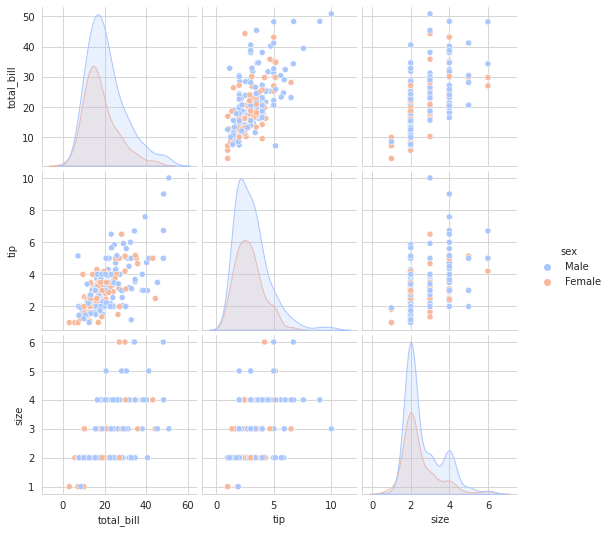

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

**rugplot()**

rugplots() are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot

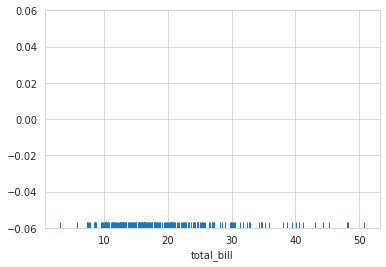

In [ ]:
sns.rugplot(tips['total_bill'])

**kdeplot()**

kdeplots() are Kernel Density Estimation plots

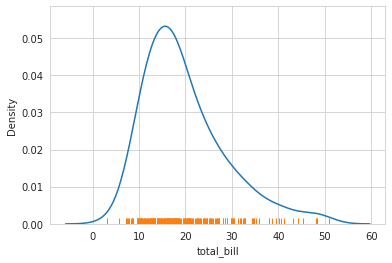

In [ ]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

**Box Plot**

A Box Plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

A Box plot shows the spread of all the data points, and also fetches other intrinsic information like the median or where most of the data cluster are, thus reflecting average trend. Basically, it is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside it, to indicate the median value. The lower and upper quartiles are shown as horizontal lines on either side of this rectangle.

Thus it depicts group of numerical data through their quartiles in Descriptive statistics. To give an elementary level understanding, Descriptive statistics is used to describe the basic features of a dataset, providing simple summaries about the sample and related measures, like median. Together with plots like a Box plot, they form the basis of virtually every quantitative analysis of data.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


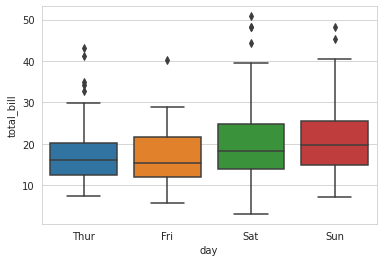

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)

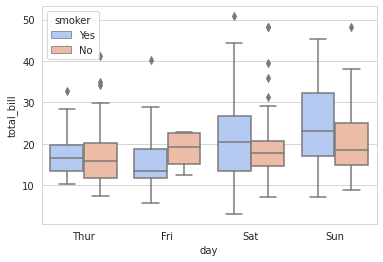

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

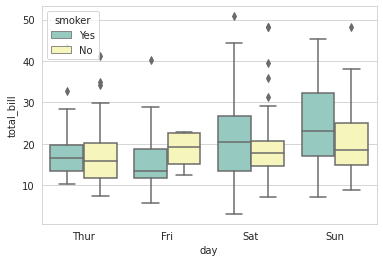

In [ ]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')

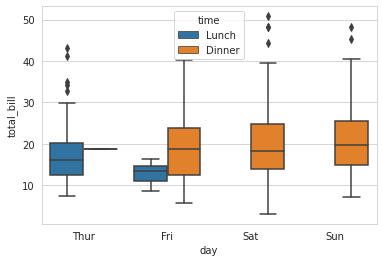

In [ ]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)

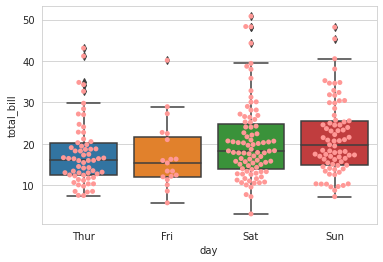

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=tableau_20[7])

**factor plot**

comparing spread of data across unique values of column - box plots for every unique value of column

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


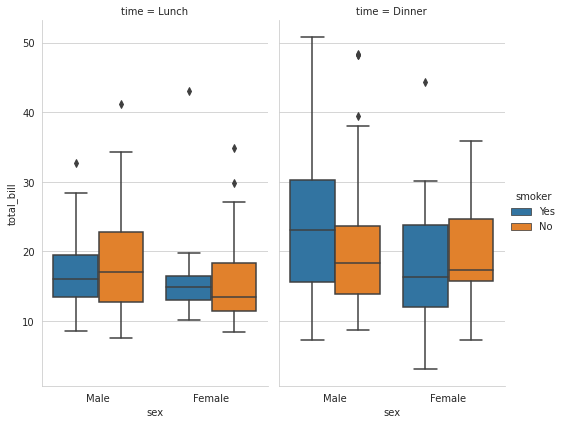

In [ ]:
sns.factorplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="box", size=6, aspect=.6)

**FacetGrid**

The term Facet here refers to a dimension or say, an aspect or a feature of a multi-dimensional dataset. This analysis is extremely useful when working with a multi-variate dataset which has a varied blend of datatypes. 

On the other hand, the term Grid refers to any framework with spaced bars that are parallel to or cross each other, to form a series of squares or rectangles. Statistically, these Grids are also used to represent and understand an entire population or just a sample space out of it. 

In general, these are pretty powerful tool for presentation, to describe our dataset and to study the interrelationship, or correlation between each facet of any environment.

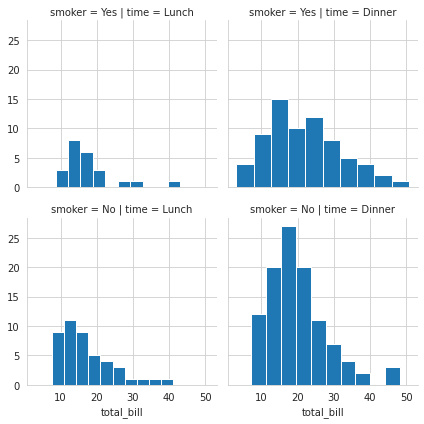

In [ ]:
# Draw a univariate plot on each facet:
x = sns.FacetGrid(tips, col='time',row='smoker')
x = x.map(plt.hist,"total_bill")

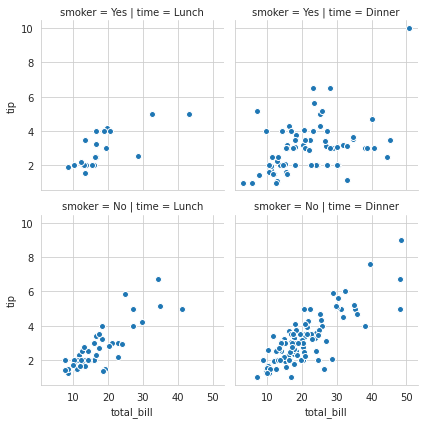

In [ ]:
# Plot a bivariate function on each facet:

x = sns.FacetGrid(tips, col="time",  row="smoker")
x = x.map(plt.scatter, "total_bill", "tip", edgecolor="w")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


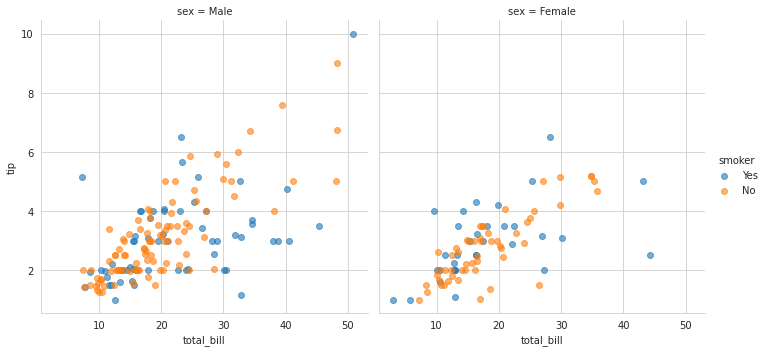

In [ ]:
# Plotting a basic FacetGrid with Scatterplot representation:
ax = sns.FacetGrid(tips, col="sex", hue="smoker", size=5)
ax.map(plt.scatter, "total_bill", "tip", alpha=.6)
ax.add_legend()

This is a combined scatter representation of Tips dataset that we have seen earlier as well, where Total tip generated against Total Bill amount is drawn in accordance with their Gender and Smoking practice. 

With this we can conclude how FacetGrid helps us visualize distribution of a variable or the relationship between multiple variables separately within subsets of our dataset. 

Important to note here is that Seaborn FacetGrid can only support upto 3-Dimensional figures, using row, column and hue dimensions of the grid for Categorical and Discrete variables within our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


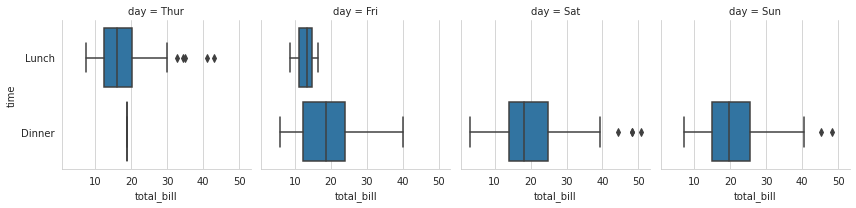

In [ ]:
# FacetGrid with boxplot
x = sns.FacetGrid(tips,col= 'day')
x = x.map(sns.boxplot,"total_bill","time")

**Heat map**

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Usually plotted for correlation matrix

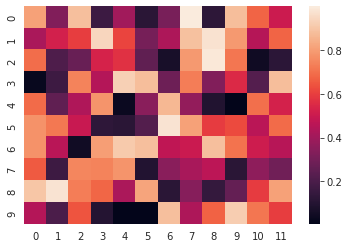

In [ ]:
# Plot a heatmap for a numpy array:

uniform_data = np.random.rand(10,12)
#uniform_data = np.arange(1,17).reshape(4,4)
sns.heatmap(uniform_data)

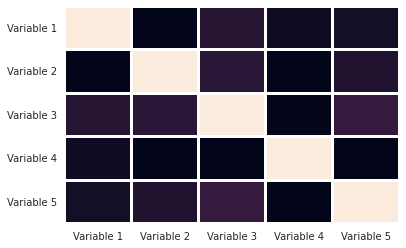

In [ ]:
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0)
plt.show()

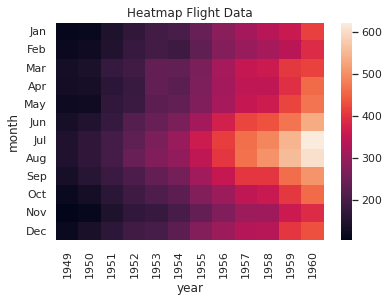

In [ ]:
sns.set()
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)
plt.title("Heatmap Flight Data")
plt.show()

**Cluster map**

Plot a matrix dataset as a hierarchically-clustered heatmap

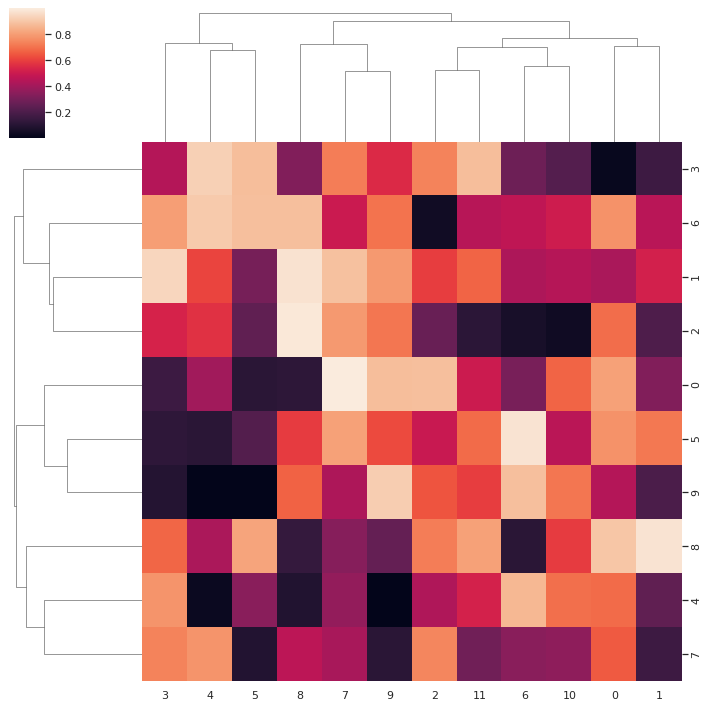

In [ ]:
sns.clustermap(uniform_data)

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


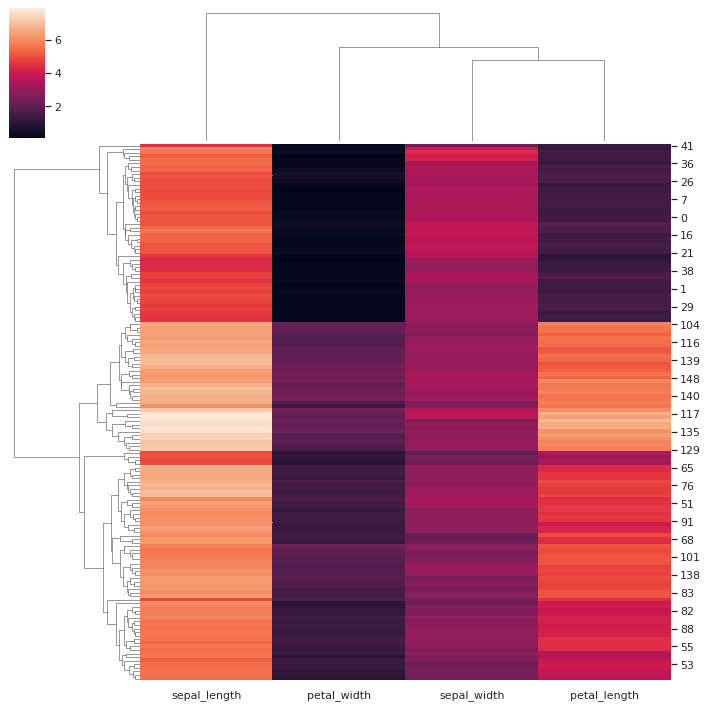

In [ ]:
species = iris.pop("species")
sns.clustermap(iris)